In [159]:
import random
import matplotlib.pyplot as plt

In [160]:
def eveil(e):
    """int->Number"""
    if e>=17 and e<21:
        return alcool(0.5)
    elif e>=21:
        return alcool(0.8)
    return 1

In [161]:
def alcool (a):
    """Number ->Number"""
    #D:dict[Number:Number]
    D={0.5:2, 0.8:10, 1.5:32}
    #pre:Number
    pre=0
    #Min:Number
    Min=1000
    #k:Number
    if a > 0.5 :
        #k:Number
        for k in D:
            if  abs(a-k) <Min:
                Min=abs(a-k)	    
                pre=k
        return a*D[pre]/pre
    return 1

In [162]:
def coeff_alcool(a,S):
    """Number*str->Number
    hyp: S=”Femme” or S==”Homme"""
    #a1:Number
    a1=a
    if alcool(a1)> 1:
        a1=a1 - sexe(S)
    return alcool(a1)

In [163]:
def jour(jour):
    """str->int"""
    if jour=='Lundi':
        return 1
    elif jour=='Mardi':
        return 2
    elif jour=='Mercredi':
        return 3
    elif jour=='Jeudi':
        return 4
    elif jour=='Vendredi':
        return 5
    elif jour=='Samedi':
        return 6
    elif jour=='Dimanche':
        return 7

In [164]:
def week(jj):
    """int->int"""
    if jj<8:
         return jj+1
    if jj==8:
        return 1

In [165]:
def moment (m,j):
    """int*str->Number"""
    #z:int
    z=m
    #jj:int
    jj=jour(j)
    if (jj==6 or jj==7) and m<24:
        if (2<=z and z<=5) or (13<=z and z<=16):
            return 5.6*2.7
        else:
            return 2.7
    elif (jj!=6 or jj!=7) and m<24:
        if (2<=z and z<=5) or (13<=z and z<=16):
            return 5.6
        else:
            return 1
    elif z%24==0:
        jj=week(jj+1)
        z=0
        return 1

In [166]:
def sexe(S):
    """str->float
    hyp: S==”Femme” or S==”Homme” """
    if S=="Femme":
        return 0.0925
    return 0.125

In [167]:
def coeff_par_voie(voie):
    """int-> Number
    hyp: voie==1 or voie==2 or voie==3"""
    if voie==1:
        return 1
    if voie ==2:
        return 16
    if voie==3:
        return 28

In [168]:
def aire_de_repos(h,h1):
      """Number*Number->Number"""
      if (h-h1)%2==0:
          return h+(1/3) 
      return h

In [169]:
def sommeil (dodo):
    """Number->Number"""
    if dodo<4:
        return 11.5
    elif 4<=dodo<5:
        return 4.3
    elif 5<=dodo<6:
        return 1.9
    elif 6<=dodo<7:
        return 1.3
    return 1 

In [170]:
def vitesse(voie):
    """int->int"""
    if 1:
        return 60
    elif 2:
        return 90
    return 130

In [183]:
def voie_globale(j,m,S,a,dodo):
    """str*int*str*Number*Number->dict[int:tuple[Number,int,Number,list[Number],bool]]
 hyp: voie = 1(voie lente), 2(voie centrale) ou 3(voie d’accélération), j est un jour de la       semaine avec une majuscule, S==”Femme” or S==”Homme”, 0<=m (moment de la journée)<=24"""
    Lcoeff_g=[]
    e1=1
    r=0
    DR=dict()      
    e=0
    fin=False
    b=True
    for c in range (1,4):
        while not  fin:
            if b:
                coeff_g=0.0000232*vitesse(c)
                coeff_g= coeff_g* coeff_alcool(a,S)* moment(m,j)* coeff_par_voie(c)* sommeil(dodo)* eveil(e)
                b=False
                if random.randrange(0,100,1)<coeff_g:
                    fin= True
            else:
                coeff_g= coeff_g* coeff_alcool(a,S)* moment(m,j)*coeff_par_voie(c)* sommeil(dodo)* eveil(e)
                epre=e
                e=aire_de_repos(e,e1)
                if epre!=e:         # h1=min de repos total   r=nb de fois ou aire de repos
                    r=r+1
                    e1=(1/3)*r
                
                if random.randrange(0,100,1)<coeff_g:
                    fin= True
            e=e+1      #nbre d’heure d’eveil
            Lcoeff_g.append(coeff_g)
        DR[c]=(e,e-e1,e1,Lcoeff_g, fin)
        Lcoeff_g=[]
        e=0
        e1=0
        r=1
        b=True
        fin=False
    return DR
voie_globale("Mardi",17,"Homme",1,4)

{1: (3.333333333333333,
  2.9999999999999996,
  0.3333333333333333,
  [0.0654675, 3.079018359375, 144.81008221435545],
  True),
 2: (2, 2, 0, [1.04748, 788.2287], True),
 3: (2, 2, 0, [1.8330899999999999, 2413.95039375], True)}

In [184]:
def list_for_graph(i,v, DT):
    """str**2*dict[int:tuple[Number, int, Number,list[Number],bool]]->list[alpha]
hyp:i==’heure de conduite’ or i==’liste de coeff’ , v appartient à [1,3]"""
    if  i=="heure de conduite":
        return [i for i in range (0, len(DT[v][3]))]
    else:
        return DT[v][3]
                                  
list_for_graph("heure de conduite",2,voie_globale("Mardi",17,"Homme",1,4))
list_for_graph("liste de coeff",2,voie_globale("Mardi",17,"Homme",1,4))

[1.04748, 788.2287]

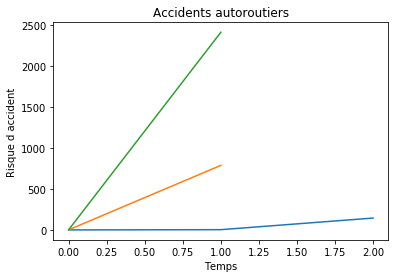

In [185]:
plt.title("Accidents autoroutiers")
plt.xlabel('Temps')
plt.ylabel('Risque d accident')
T1=list_for_graph("heure de conduite",1,voie_globale("Mardi",17,"Homme",1,4))
A1=list_for_graph("liste de coeff",1,voie_globale("Mardi",17,"Homme",1,4))
plt.plot(T1,A1)
T2=list_for_graph("heure de conduite",2,voie_globale("Mardi",17,"Homme",1,4))
A2=list_for_graph("liste de coeff",2,voie_globale("Mardi",17,"Homme",1,4))
plt.plot(T2,A2)
T3=list_for_graph("heure de conduite",3,voie_globale("Mardi",17,"Homme",1,4))
A3=list_for_graph("liste de coeff",3,voie_globale("Mardi",17,"Homme",1,4))
plt.plot(T3,A3)
plt.show()